In [6]:
import matplotlib.pyplot as plt
import numpy as np
import astropy
from astropy import units
from astropy.coordinates import SkyCoord
from astropy.table import Table
import scipy
import numpy as np
from tqdm import tqdm
import indigo
plt.style.use(indigo.mplstyle)


In [7]:
dataset = Table.read('./02_results/GalacticDWDBeaming.ecsv')

n_dwds = 0

for n_seed in range(10):
    t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                  (dataset['beaming_falseAlarmProbab'][:,n_seed]<1e-5)*\
                  (dataset['r']<20)]
    n_dwds += len(t_dataset)

n_dwds = n_dwds/10

print(n_dwds)

n_dwds = 0
for n_seed in range(10):
    t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                  (dataset['beaming_falseAlarmProbab'][:,n_seed]<1e-5)*\
                  (dataset['r']<20)*\
                  (np.abs(((dataset['beaming_period'][:,n_seed])-dataset['period_hour'])/\
                         dataset['period_hour'])<0.5)]
    n_dwds += len(t_dataset)

n_dwds = n_dwds/10

print(n_dwds)

n_dwds = 0
for n_seed in range(10):
    t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                  (dataset['beaming_falseAlarmProbab'][:,n_seed]<0.00001)*\
                  (dataset['r']<20)*\
                  (np.abs(((dataset['beaming_period'][:,n_seed])-dataset['period_hour'])/\
                         dataset['period_hour'])>0.5)]
    n_dwds += len(t_dataset)

n_dwds = n_dwds/10

print(n_dwds)

71.7
71.4
0.3


In [3]:
cutoffs = np.logspace(-6,-3,7)
noise = 100*1000*cutoffs
detections = []
for cutoff in tqdm(cutoffs):
    n_dwds = 0
    
    for n_seed in range(10):
        t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                      (dataset['beaming_falseAlarmProbab'][:,n_seed]<cutoff)*\
                      (dataset['r']<20)]
        n_dwds += len(t_dataset)
    
    n_dwds = n_dwds/10
    detections.append(n_dwds)

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 63.00it/s]


<>:5: SyntaxWarning: invalid escape sequence '\#'
<>:5: SyntaxWarning: invalid escape sequence '\#'
/var/folders/85/x0hqj_21233_0wt3y8p78bzc0000gn/T/ipykernel_83867/3635052243.py:5: SyntaxWarning: invalid escape sequence '\#'
  plt.ylabel('\#')


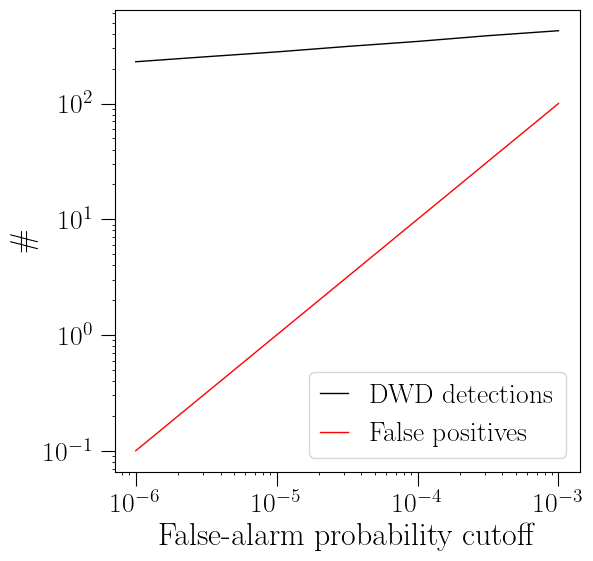

In [126]:
plt.plot(cutoffs,4*np.array(detections),'k',label='DWD detections')
plt.loglog(cutoffs,noise,'r',label='False positives')

plt.xlabel('False-alarm probability cutoff')
plt.ylabel('\#')

plt.legend()
plt.savefig('02_Results/falseAlarmRate.pdf',bbox_inches='tight')

In [71]:
dataset = Table.read('./02_results/GalacticDWDBeaming_Noise.ecsv')

n_dwds = 0

for n_seed in range(10):
    t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                  (dataset['beaming_falseAlarmProbab'][:,n_seed]<0.0001)*\
                  (dataset['r']<22)]
    n_dwds += len(t_dataset)

n_dwds = n_dwds/10

print(n_dwds)


0.7


(0.0, 1.0)

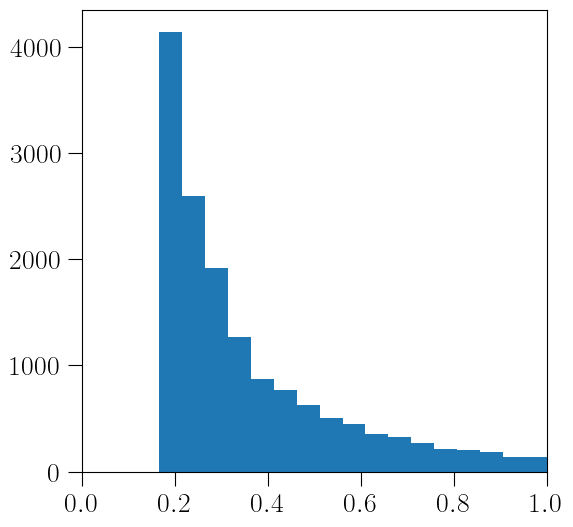

In [43]:
plt.hist(dataset['beaming_period'][:,n_seed][dataset['beaming_period'][:,n_seed]>0],bins=1000);
plt.xlim(0,1)

In [ ]:
dataset = Table.read('./03_results/GalacticDWDBeaming.ecsv')

for n_seed in range(10):
    t_dataset = dataset[(-0.03<dataset['beaming_falseAlarmProbab'][:,n_seed])*\
                  (dataset['beaming_falseAlarmProbab'][:,n_seed]<0.003)*\
                  (dataset['r']<22)*\
                  (np.abs(((dataset['beaming_period'][:,n_seed])-dataset['period_hour'])/\
                         np.min([dataset['beaming_period'][:,n_seed],dataset['period_hour']],axis=0))<0.5)]

recoverability = []
recoverability_index = []

for ii_dwd in tqdm(range(len(dataset))):
    dwd = dataset[ii_dwd]
    Period = dwd['period_hour']*units.hour
    M1 = dwd['M1']*units.M_sun
    M2 = dwd['M2']*units.M_sun
    R1 = dwd['R1']*units.R_sun
    R2 = dwd['R2']*units.R_sun
    T1 = 10**dwd['logTeff1']*units.K
    T2 = 10**dwd['logTeff2']*units.K
    inclination = dwd['inclination']*units.degree
    source_magnitude = {'u':dwd['u'],'g':dwd['g'],'r':dwd['r'],'i':dwd['i'],'z':dwd['z'],'y':dwd['y']}

    source_RA = dwd['RA_ICRS']*units.degree
    source_DEC = dwd['DEC_ICRS']*units.degree

    source_coordinate = SkyCoord(source_RA,source_DEC,frame='icrs')

    observation_filters = list('ugrizy')

    params = [M1,M2,R1,R2,T1,T2,Period,inclination,source_magnitude,source_coordinate,observation_filters]

    recoverability.append(params)

In [83]:
tAge_counts = np.array([4,6,9,10,2,1])

cum_arr = tAge_counts.cumsum() / tAge_counts.sum()
idx = np.searchsorted(cum_arr, np.linspace(0, 1, 3, endpoint=False)[1:])
# idx gives locations where the array should be split so that each split has equal number of stars
tAge_counts_split = np.split(tAge_counts, idx)

In [89]:
idx

array([2, 3])